In [2]:
import pandas as pd
import os
import glob
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

warnings.filterwarnings('ignore')


from google.colab import drive
drive.mount ('/content/drive')

# Define the path to the directory containing the CSV files
path = '/content/drive/MyDrive/Colab_Notebooks/Vision_Care_Insurance_Section1_Group2/'

# Use the glob module to find all CSV files in the directory
csv_files = glob.glob(path + '*.csv')

# Create an empty list to store the data frames
dfs = []

# Loop through each CSV file and read it into a data frame
for file in csv_files:
    result = pd.read_csv(file)
    dfs.append(result)

# Concatenate all data frames into a single data frame
df = pd.concat(dfs, ignore_index=True)

In [ ]:
#Filter unknown locations
exclude_locations = ['National','Missing Location']

# Filter the data frame to exclude the specified locations
df = df[~df['LocationDesc'].isin(exclude_locations)]

# Create a dataframe for Patients with Eye Health Conditions
df_Eye_Hlth = df[df['Topic'] == 'Eye Health Conditions']

#Changing Category names for better plot visualization
name_mapping = {'Other Visual Disturbances' : 'Visual Disturbances',
'Other Retinal Disorders': 'Retinal Disorders',
'Strabismus and Amblyopia' : 'Strabismus and Amblyopia',
'Diabetic Eye Diseases' : 'Diabetic Retinopathy',
'Age Related Macular Degeneration' : 'Macular Degeneration',
'Orbital and External Disease' : 'Orbital Disease',
'Disorders of Refraction and Accommodation' : 'Refractive Disorders',
'Disorders of Optic Nerve and Visual Pathways': 'Optic Neuropathy',
'Retinal Detachment and Defects' : 'Retinal Detachment',
'Diagnosed Blindness and Low Vision' : 'Vision Loss',
'Cancer and Neoplasms of the Eye' : 'Eye Cancer',
'Infectious and Inflammatory Diseases' : 'Eye Infections',
'Injury, Burns and Surgical Complications of the Eye' : 'Eye Trauma',
'Treatment for glaucoma' : 'Glaucoma Treatment',
'Treatment for diabetic retinopathy' : 'Diabetic retinopathy treatment',
'Imaging or diagnostic test' : 'Radiology test',
'Treatment for age related macular degeneration' : 'Macular Degeneration treatment'}


# Replace the old values with the new values in the "Category" column
df['New_Category'] = df['Category'].replace(name_mapping)

df_Eye_Hlth['New_Category'] = df_Eye_Hlth['Category'].replace(name_mapping)

In [ ]:
#Dividing locations into four different regions
def get_location_section(location):
    if location in ['Vermont','New York','Maine','Virginia','New Jersey','Puerto Rico','Massachusetts','Delaware','Rhode Island','Pennsylvania','Connecticut','Maryland','New Hampshire','Kansas']:
        return 'US-east'
    elif location in ['Alaska','Oregon','Montana','Idaho','Wyoming','Arizona','Colorado','Utah','Nevada','Hawaii','California','Washington','New Mexico']:
        return 'US-west'
    elif location in ['Minnesota','Ohio','Michigan','Wisconsin','Illinois','Nebraska','Iowa','North Dakota']:
        return 'US-north'
    elif location in ['Florida','Kentucky','North Carolina','Oklahoma','Georgia','Tennessee','South Dakota','Alabama','Indiana','Texas','Missouri','West Virginia','Arkansas','Louisiana','Mississippi']:
        return 'US-south'
    else:
        return 'Missing Location'

df['Location_Region'] = df['LocationDesc'].apply(get_location_section)

df_Eye_Hlth['Location_Region'] = df_Eye_Hlth['LocationDesc'].apply(get_location_section)

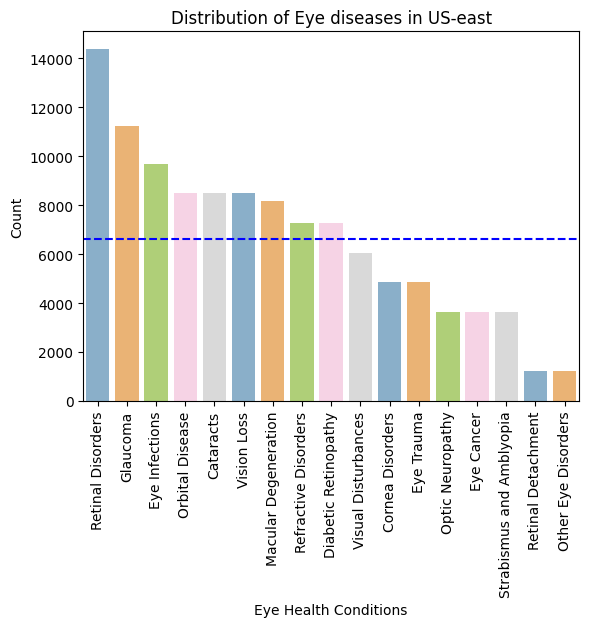

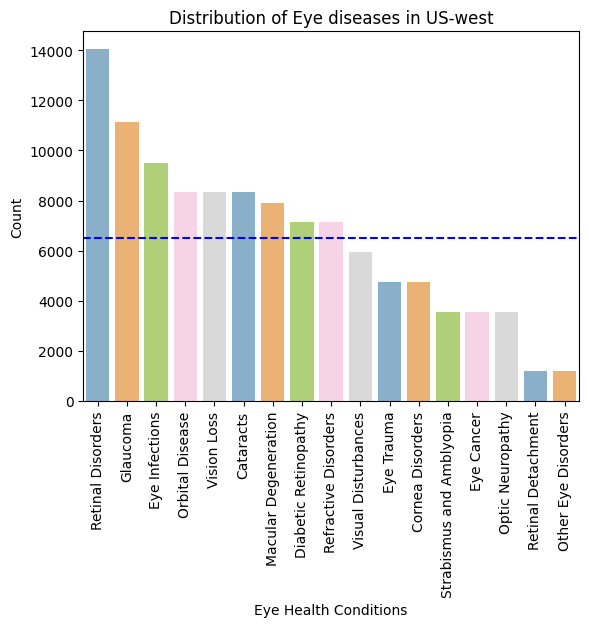

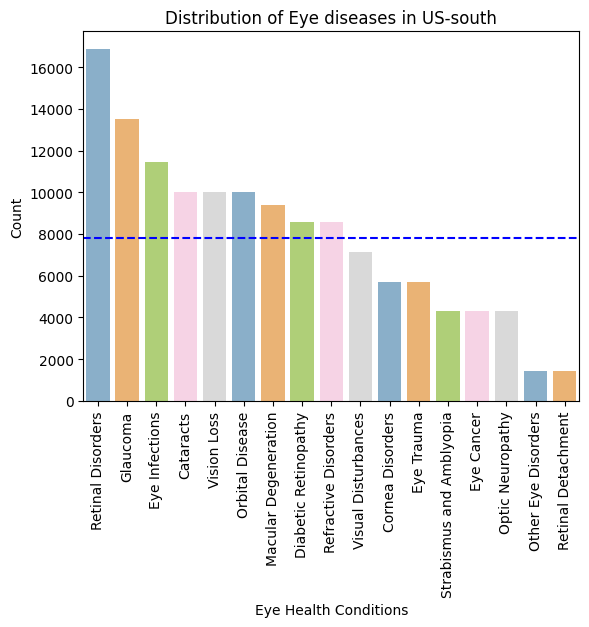

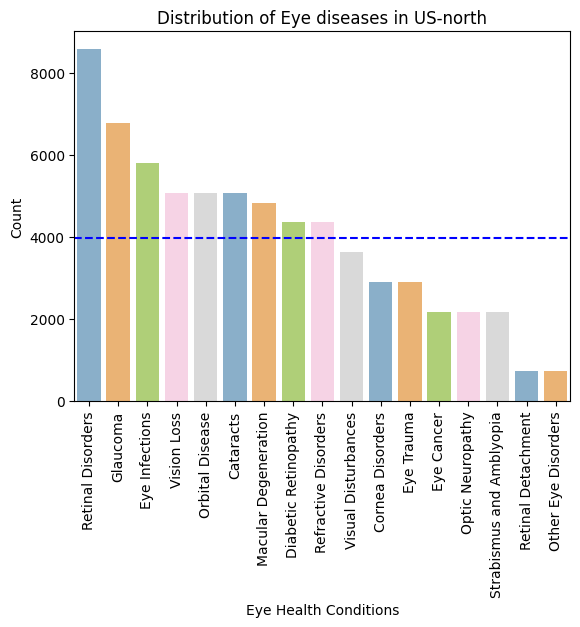

In [ ]:
colors = ["#80B1D3", "#FDB462", "#B3DE69", "#FCCDE5", "#D9D9D9"]

# create a list of unique regions
regions = df_Eye_Hlth["Location_Region"].unique()

# loop through each region and create a plot
for region in regions:
    # filter the data by region
    region_data = df_Eye_Hlth[df_Eye_Hlth["Location_Region"] == region]
    
    # create a countplot with hue based on Category
    sns.countplot(x="New_Category", data=region_data, order=region_data['New_Category'].value_counts().index,palette = colors)
    
    # add a horizontal line for the mean count
    plt.axhline(y=region_data['New_Category'].value_counts().mean(), color='b', linestyle='--')
    
    # set the title of the chart
    plt.title(f"Distribution of Eye diseases in {region}")
    
    # rotate the x-axis labels
    plt.xticks(rotation=90)
    plt.xlabel("Eye Health Conditions")
    plt.ylabel("Count")
    
    # display the chart
    plt.show()

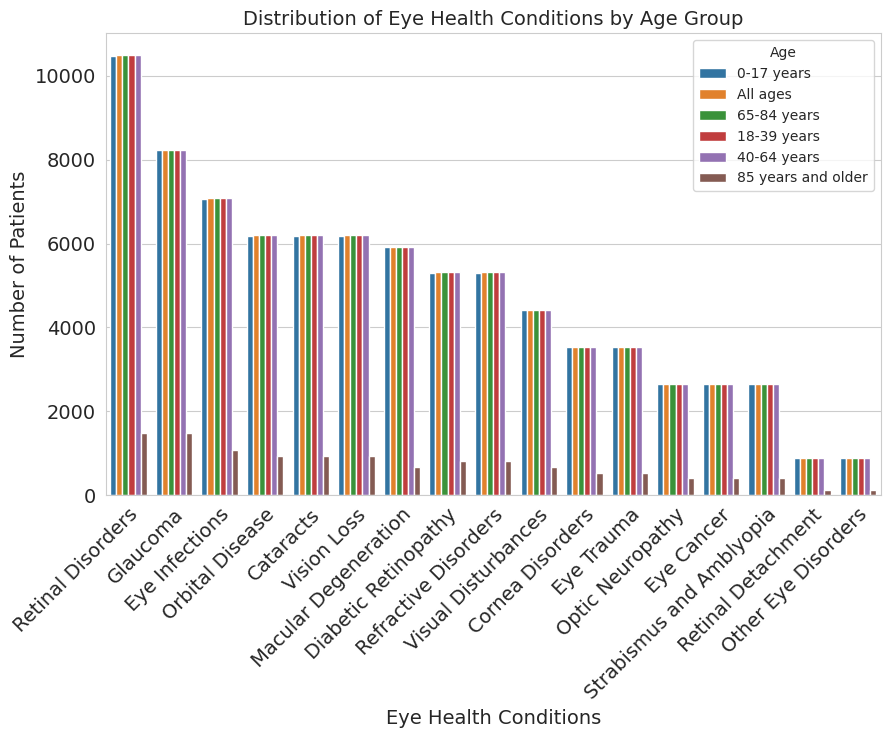

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.countplot(data=df_Eye_Hlth, x='New_Category', hue='Age', order=df_Eye_Hlth['New_Category'].value_counts().index)
plt.title("Distribution of Eye Health Conditions by Age Group", fontsize = 14)
plt.xlabel("Eye Health Conditions", fontsize = 14)
plt.ylabel("Number of Patients", fontsize = 14)

plt.xticks(rotation=45, rotation_mode='anchor', ha='right')
plt.tick_params(axis='both', which='major', labelsize=14)

plt.show()

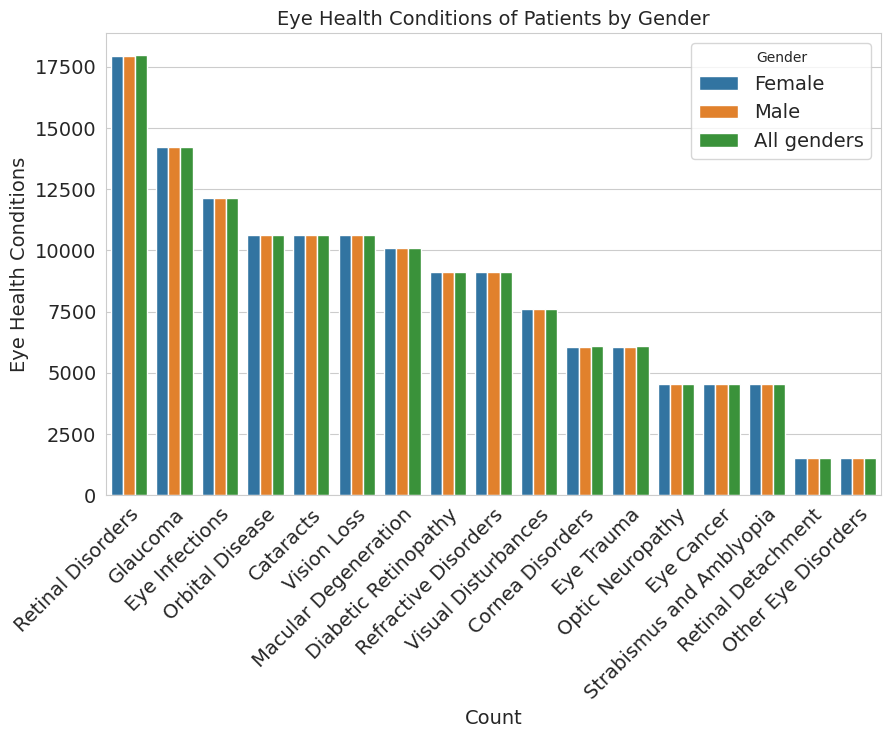

In [ ]:
# Create the crosstab
# category_gender = pd.crosstab(df_Eye_Hlth['New_Category'], df_Eye_Hlth['Gender'])


# # Define the bar plot
# fig = go.Figure()

# for gender in category_gender.columns:
#     fig.add_trace(go.Bar(
#         y=category_gender.index,
#         x=category_gender[gender],
#         name=gender,
#         orientation='h',
#         hovertemplate='%{x}',
#         hoverinfo='x',
#         marker=dict(opacity=0.8)
#     ))

# # Set the layout of the plot
# fig.update_layout(
#     barmode='stack',
#     width=1000,
#     height=700,
#     hovermode='closest',
#     title='Eye Health Conditions of Patients by Gender',
#     title_x=0.5,
#     margin=dict(t=30), # Set the top margin to 80 pixels,
#     xaxis=dict(title='Count', tickformat='.0f'),
#     yaxis=dict(title='Eye Health Conditions', tickformat='.0f'),
#     legend=dict(title='Gender')
# )

# # Show the plot
# fig.show()


sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.countplot(data=df_Eye_Hlth, x='New_Category', hue='Gender', order=df_Eye_Hlth['New_Category'].value_counts().index)
plt.title("Eye Health Conditions of Patients by Gender", fontsize = 14)
plt.xlabel("Count", fontsize = 14)
plt.ylabel("Eye Health Conditions", fontsize = 14)
plt.legend(title='Gender',fontsize = 14)
plt.xticks(rotation=45,rotation_mode='anchor', ha='right')
plt.tick_params(axis='both', which='major', labelsize=14)

plt.show()

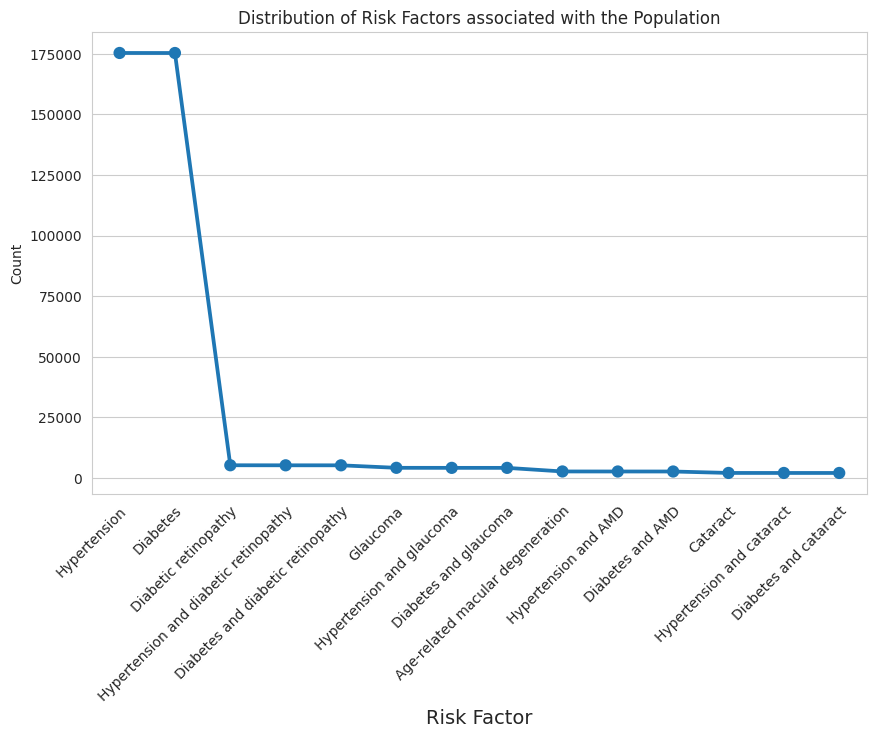

In [ ]:
df_Risk_factor = df[df['RiskFactor'] != 'All patients']

RiskFactor_counts = df_Risk_factor['RiskFactor'].value_counts().reset_index()
RiskFactor_counts.columns = ['RiskFactor', 'Count']

plt.figure(figsize=(10,6))
sns.pointplot(data=RiskFactor_counts, x="RiskFactor", y="Count")
plt.xticks(rotation=90)
plt.title("Distribution of Risk Factors associated with the Population")
plt.xlabel("Risk Factor",fontsize = 14)
plt.ylabel("Count")

plt.xticks(rotation=45,rotation_mode='anchor', ha='right')

plt.show()

In [ ]:
Eye_Health_Conditions_category = pd.crosstab(df_Eye_Hlth['New_Category'], df_Eye_Hlth['Topic'])

fig = go.Figure(data=[go.Pie( labels=Eye_Health_Conditions_category.index,   
                              values=Eye_Health_Conditions_category['Eye Health Conditions'],
                              hovertemplate='Category: %{label}<br>Count: %{value}<extra></extra>',
                              texttemplate='%{percent:.0%}',
                              marker=dict(line=dict(color='#000000', width=1)))])

fig.update_layout(
                  width=800,
                  height=600,
                  title='Distribution of Eye Health Conditions',
                  title_x=0.2,
                  title_y=0.9,
                  legend=dict(title='Eye Health Conditions')
)

fig.show()

In [ ]:
df_service = df[df['Topic'] == 'Service Utilization']

Service_Utilization_category = pd.crosstab(df_service['New_Category'], df_service['Topic'])

fig = go.Figure(data=[go.Pie(labels=Service_Utilization_category.index,
                             values=Service_Utilization_category['Service Utilization'],
                             hovertemplate='Category: %{label} <br>Count: %{value}<extra></extra>',
                             texttemplate='%{percent:.0%}',
                             marker=dict(line=dict(color='#000000', width=1)))])

fig.update_layout(
                  width=800,
                  height=600,
                  title='Distribution of Service Utilization',
                  title_x=0.2,
                  title_y=0.9,
                  legend=dict(title='Categories')
)
fig.show()